In [82]:
import numpy as np
import pandas as pd 

In [83]:

path = r"C:\Users\sapko\OneDrive\Documents\Learning\100 Days of Deep Learning\Day8\Churn_Modelling.csv"
df = pd.read_csv(path)

In [84]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [85]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [86]:
df.duplicated().sum() 

0

In [87]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [88]:
# imbalanced dataset 

In [89]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [90]:
#since the first 3 columns aren't important to us for the curn prediction we will remove them 
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace = True) 

In [91]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [92]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first= True)

In [93]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [94]:
from sklearn.model_selection import train_test_split 

In [95]:
X = df.drop(columns=['Exited'])
y= df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1)

In [96]:
X_train.shape

(8000, 11)

In [97]:
# StandardScaler

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s

StandardScaler has various methods which includes 
- fit_transform() : Fit to data and then transform it 
- transform() perform standardization by centering and scaling 

In [98]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 


In [99]:
X_train_scaled = scaler.fit_transform(X_train) # this will fit as well as transform it 


In [100]:
scaler.mean_

array([6.50313625e+02, 3.88872500e+01, 5.02500000e+00, 7.64634433e+04,
       1.53187500e+00, 7.07000000e-01, 5.11500000e-01, 1.00143430e+05,
       2.53750000e-01, 2.47000000e-01, 5.44250000e-01])

In [101]:
scaler.scale_

array([9.66709471e+01, 1.04682395e+01, 2.88567583e+00, 6.23686450e+04,
       5.83510055e-01, 4.55138440e-01, 4.99867733e-01, 5.75712856e+04,
       4.35156222e-01, 4.31266739e-01, 4.98038088e-01])

In [102]:
# whtat happens is that using this mean and standard deviation the Scaling formula is used for every data points 

In [103]:
X_test_scaled = scaler.transform(X_test)

In [104]:
X_train_scaled.shape

(8000, 11)

In [105]:
import tensorflow 
from tensorflow import keras 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense 

# To learn aboout the warmups 
https://arxiv.org/pdf/1706.02677.pdf 
https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/CosineDecay

In [317]:
from sklearn.utils import class_weight 


In [331]:
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import LearningRateScheduler 
from tensorflow.keras.optimizers.schedules import CosineDecay 
from tensorflow.keras.layers import Dropout, Add, Input
from tensorflow.keras import Model 
class MyModel: 
    def __init__(self, input_shape, learning_rate = 0.1, total_epochs=100, warmup_epochs= 5 ): 
        self.input_shape = input_shape
        self.initial_learning_rate = learning_rate
        self.total_epochs = total_epochs
        self.warmup_epochs = warmup_epochs 
        self.model = self.create_model() 
    
    def create_model(self): 
        # creating a residual architecture 
        inputs = Input(shape=(self.input_shape,))
        x = Dense(256, activation='relu')(inputs)
        x = Dropout(0.5)(x)

        # Adding residual blocks
        for _ in range(6):  # Adding 6 residual blocks
            y = Dense(128, activation='relu')(x)
            y = Dropout(0.5)(y)
            y = Dense(256, activation='relu')(y)
            y = Dropout(0.5)(y)
            x = Add()([x, y])  # Adding residual connection

        # Final layers
        x = Dense(1, activation='sigmoid')(x)
        
        model = Model(inputs=inputs, outputs=x)
        return model 
    
    def compile_model(self): 
        # # Create a warm-up schedule
        # target_learning_rate = 1e-5
        # # Create a cosine learning rate scheduler
        # cosine_decay = CosineDecay(initial_learning_rate=self.initial_learning_rate,
        #                            decay_steps=100)
        optimizer = Adam(learning_rate=1e-4)  # Specify the learning rate here
        self.model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics= ['accuracy'])


    def summary(self): 
        return self.model.summary()  


In [332]:
churn_model = MyModel(11)

In [333]:
# churn_model.compile_model()

In [334]:
print(churn_model.summary())

Model: "functional_197"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_28      │ (None, 11)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_185 (Dense)   │ (None, 256)       │      3,072 │ input_layer_28[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_67          │ (None, 256)       │          0 │ dense_185[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_186 (Dense)   │ (None, 128)       │     32,896 │ dropout_67[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_68          │ (None, 128)       │          0 │ dense_186[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_187 (Dense)   │ (None, 256)       │     33,024 │ dropout_68[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_69          │ (None, 256)       │          0 │ dense_187[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_13 (Add)        │ (None, 256)       │          0 │ dropout_67[0][0], │
│                     │                   │            │ dropout_69[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_188 (Dense)   │ (None, 128)       │     32,896 │ add_13[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_70          │ (None, 128)       │          0 │ dense_188[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_189 (Dense)   │ (None, 256)       │     33,024 │ dropout_70[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_71          │ (None, 256)       │          0 │ dense_189[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_14 (Add)        │ (None, 256)       │          0 │ add_13[0][0],     │
│                     │                   │            │ dropout_71[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_190 (Dense)   │ (None, 128)       │     32,896 │ add_14[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_72          │ (None, 128)       │          0 │ dense_190[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_191 (Dense)   │ (None, 256)       │     33,024 │ dropout_72[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_73          │ (None, 256)       │          0 │ dense_191[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_15 (Add)        │ (None, 256)       │          0 │ add_14[0][0],     │
│                     │                   │            │ dropout_73[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_192 (Dense)   │ (None, 128)       │     32,896 │ add_15[0][0]      │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 398,849 (1.52 MB)

 Trainable params: 398,849 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

None


In [335]:
churn_model.compile_model()  # compile the model 

In [336]:
train_X , val_X , train_y , val_y = train_test_split(X_train_scaled, y_train)

In [337]:
class_weights = class_weight.compute_class_weight(class_weight='balanced',classes= np.unique(train_y), y= train_y)


In [340]:
print("Class weights:", class_weights)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}


Class weights: [0.62800921 2.45298446]


In [341]:
from tensorflow.keras.callbacks import EarlyStopping 
early_stopping = EarlyStopping(monitor = 'val_loss', patience=10)

history = churn_model.model.fit(train_X,train_y,validation_data=(val_X,val_y) , epochs=100, callbacks=[early_stopping],class_weight=class_weights_dict)

Epoch 1/100


188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5028 - loss: 1.3048 - val_accuracy: 0.7320 - val_loss: 0.6172
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5036 - loss: 0.9467 - val_accuracy: 0.7275 - val_loss: 0.6048
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5430 - loss: 0.7944 - val_accuracy: 0.6795 - val_loss: 0.6213
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5481 - loss: 0.7662 - val_accuracy: 0.6955 - val_loss: 0.6054
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5762 - loss: 0.7031 - val_accuracy: 0.7305 - val_loss: 0.5803
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6037 - loss: 0.6742 - val_accuracy: 0.7125 - val_loss: 0.5848
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6047 - loss: 0.6563 - val_accuracy: 0.7140 - val_loss: 0.5737
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6261 - loss: 0.6465 - val_accuracy: 0.7140

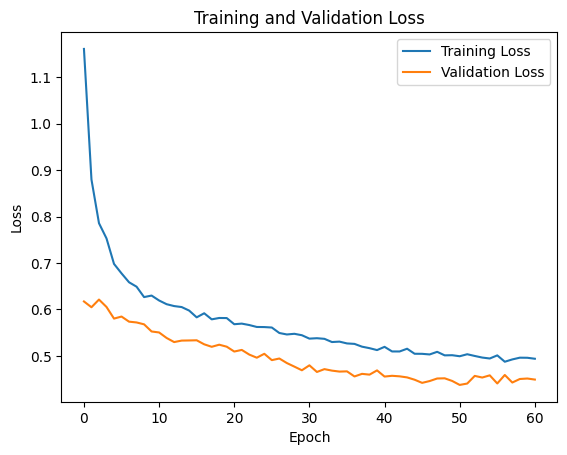

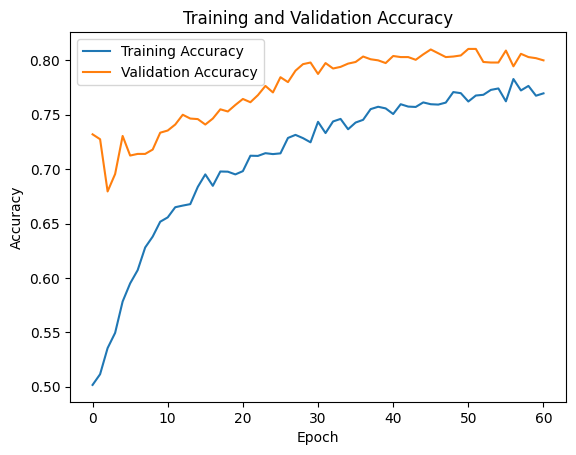

<Figure size 640x480 with 0 Axes>

In [342]:
!pip install matplotlib
import matplotlib.pyplot as plt 
# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
plt.savefig(r"C:\Users\sapko\OneDrive\Documents\Learning\100 Days of Deep Learning\Day8\try4_loss.png")

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
plt.savefig(r"C:\Users\sapko\OneDrive\Documents\Learning\100 Days of Deep Learning\Day8\try4_train_val_curve.png")


In [343]:
churn_model.model.save(r"C:\Users\sapko\OneDrive\Documents\Learning\100 Days of Deep Learning\Day8\march_14_churnmodel.h5")

In [344]:
churn_model.model.layers[0].get_weights() 

[]

In [345]:
y_log = churn_model.model.predict(X_test_scaled)
y_pred = np.where(y_log>0.5, 1, 0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [346]:
from sklearn.metrics import accuracy_score 


In [347]:
accuracy_score(y_test, y_pred)

0.811